<div style="width: 100%; overflow: hidden;">
    <div style="width: 500px; float: left;"> 
        <h1>Ingenieurinformatik – Übung</h1>
        Lehrstuhl <b>Computational Civil Engineering</b><br>
        Kontakt: <a href = "mailto: cce-inginf@uni-wuppertal.de">Email senden</a> | Individuelle Kontakte siehe Webseite des Lehrstuhls<br>
        Links: 
        <a href="cce.uni-wuppertal.de/inginf">Vorlesungsskript</a> | 
        <a href="cce.uni-wuppertal.de/">Webseite des Lehrstuhls</a>
    </div>
    <div style="float:right;"> 
        <img src="logo_cce_combined.png" style="width:150px;"/>
    </div>
</div>

# Modellierung

## Lineare Regression

### Lineare Regression zu Fuß

Gegeben sind zwei numpy Arrays. Die Daten Zeigen das Verhähltnis zwischen Lernzeit und Note für 10 Studentinnen.

`Lernzeit = np.array([2,7,11,17,20,22,30,35,39,41])`

`Note = np.array([5,5,4,3.7,3,3.7,2.7,2,2.3,1])`

I. Plotten Sie die Daten auf ein Scatter Plot, wobei die Lernzeit auf der X-Achse und der Note auf der Y-Achse aufgetragen werden sollen.

II. Eine lineare Regression sucht die Gerade, die den quadratischen Abstand aller Messwerte zu jener Gerade minimiert. Folgend sind die beiden Formeln für die Steigung $m$ und den y-Achsenabschnitt $b$ der gesuchten Gerade. $n$ ist die Anzahl der Datenpunkte.

$$
m &= \frac{(n \cdot \sum xy) - (\sum x \cdot \sum y)}{(n \cdot \sum x^2) - ((\sum x)^2)}\\
b &= \frac{\sum y - (m \cdot \sum x)}{n}
$$

Berechnen Sie mit den gegebenen Daten und mithilfe der beiden Formeln die Gerade.

III. Speichern Sie die berechnete Gerade in einer Funktion und bennenen Sie diese. 

#### Lösung I

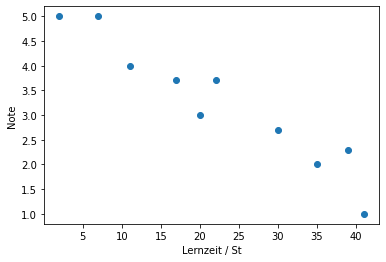

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Lernzeit = np.array([2,7,11,17,20,22,30,35,39,41])
Note = np.array([5,5,4,3.7,3,3.7,2.7,2,2.3,1])

plt.scatter(Lernzeit,Note)
plt.xlabel('Lernzeit / St')
plt.ylabel('Note')
plt.show()

#### Lösung II

In [24]:
#Steigung

x_summe = np.sum(Lernzeit)
y_summe = np.sum(Note)
xy_summe = np.sum(Lernzeit*Note)
xx_summe = np.sum(Lernzeit**2)

m = ((10*xy_summe)-(x_summe*y_summe))/((10*xx_summe)-(x_summe**2))
print(m)

#Achsenabschnitt

b = (y_summe-m*x_summe)/10
print(b)

-0.09101666264187402
5.278773243177978


#### Lösung III

In [4]:
# y = m*x + b

def zufuss(Stunden):
    return -0.091*Stunden + 5.278

### Lineare Regression mit `np.polyfit()`

Berechnen Sie die Koeffizienten $m$ und $b$ mithilfe `np.polyfit()`.

#### Lösung

In [5]:
polyline = np.polyfit(Lernzeit,Note,1)
polyline

array([-0.09101666,  5.27877324])

### Vergleichen der Lösungswege

Plotten Sie die Datenpunkte, und beide berechnete Linien mit matplotlib.

#### Lösung

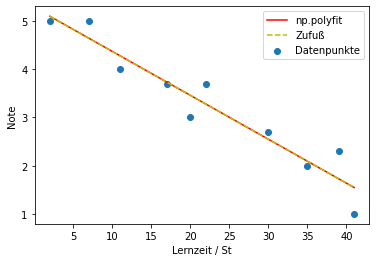

In [6]:
plt.plot(Lernzeit, polyline[0]*Lernzeit + polyline[1], 'r', label='np.polyfit')
plt.plot(Lernzeit, zufuss(Lernzeit), '--y', label='Zufuß')
plt.scatter(Lernzeit, Note, label='Datenpunkte')
plt.xlabel('Lernzeit / St')
plt.ylabel('Note')
plt.legend()
plt.show()

### Schätzung

Eine Regression erlaubt es, Erwartungswerte für Punkte zu erhalten, für die man keine Daten hat.\
Was wäre die erwartete Note einer Studentin, die 25 Stunden gelernt hat? 

#### Lösung

3.0029999999999997


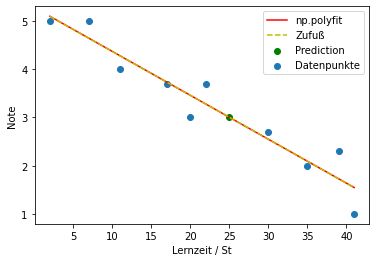

In [7]:
print(zufuss(25))

plt.scatter(25, zufuss(25), c='g', label='Prediction')

plt.plot(Lernzeit, polyline[0]*Lernzeit + polyline[1], 'r', label='np.polyfit')
plt.plot(Lernzeit, zufuss(Lernzeit), '--y', label='Zufuß')
plt.scatter(Lernzeit, Note, label='Datenpunkte')
plt.xlabel('Lernzeit / St')
plt.ylabel('Note')
plt.legend()
plt.show()